In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import shutil
import pandas as pd

C:\Users\ramir\.conda\envs\525_2022\lib\site-packages\ipykernel\parentpoller.py:109: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [3]:
# Downloading data 
article_id = 14096681 
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
#output
output_directory = "data/"
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  
files = data["files"]             
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [3]:
%%time
files_to_dl = ["data.zip"]  
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: total: 8.58 s
Wall time: 3min 12s


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza |  |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll        | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 5.69s      |
| Ramiro               | Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz                | No    | 7 mins 31s |

In [4]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: total: 19.4 s
Wall time: 1min 40s


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll        | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 16.4s      |
| Ramiro Mejia         | Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz               | No    | 2 mins 10s |

In [5]:
# moving/excluding observed rain_fall to another folder 

observed_rain_fall = 'observed_daily_rainfall_SYD.csv'

os.makedirs(os.path.join(output_directory, 'observed_daily_rainfall_SYD'), exist_ok=True)

if os.path.exists(os.path.join(output_directory, observed_rain_fall)):
    shutil.move(os.path.join(output_directory, observed_rain_fall), os.path.join(output_directory, 'observed_daily_rainfall_SYD/', observed_rain_fall))

In [6]:
%ls data

 Volume in drive C is OS
 Volume Serial Number is 4AFF-EDFD

 Directory of C:\Users\ramir\OneDrive\Desktop\MDS_UBC_2021\labs_block6\525\DSCI-525_Group-6\notebook\data

03/31/2022  12:56 PM    <DIR>          .
03/31/2022  12:56 PM    <DIR>          ..
03/31/2022  12:56 PM    <DIR>          __MACOSX
03/31/2022  12:55 PM       127,613,760 ACCESS-CM2_daily_rainfall_NSW.csv
03/31/2022  12:55 PM       114,707,410 ACCESS-ESM1-5_daily_rainfall_NSW.csv
03/31/2022  12:55 PM        94,960,113 AWI-ESM-1-1-LR_daily_rainfall_NSW.csv
03/31/2022  12:55 PM       294,260,911 BCC-CSM2-MR_daily_rainfall_NSW.csv
03/31/2022  12:56 PM        55,224,437 BCC-ESM1_daily_rainfall_NSW.csv
03/31/2022  12:56 PM        46,286,371 CanESM5_daily_rainfall_NSW.csv
03/31/2022  12:55 PM       330,360,682 CMCC-CM2-HR4_daily_rainfall_NSW.csv
03/31/2022  12:56 PM       328,787,320 CMCC-CM2-SR5_daily_rainfall_NSW.csv
03/31/2022  12:55 PM       328,852,379 CMCC-ESM2_daily_rainfall_NSW.csv
03/31/2022  12:55 PM       814,041,183

#### 1. Combine data CSVs into a single CSV using pandas.

In [7]:
%%time

files = glob.glob(f"data/*.csv")
                  
df = pd.concat((pd.read_csv(file, index_col=0)
                .assign(file=re.findall(r"[\/|\\](.*)_daily_rainfall", file)[0])
                for file in files)
              )

df.to_csv(os.path.join(output_directory, "combined_data.csv"))

CPU times: total: 7min 13s
Wall time: 12min 21s


In [8]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),file
time,,,,,,
1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,3.293256e-13,ACCESS-CM2
1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,1.047658e-02,ACCESS-CM2


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 7 mins 9s  |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz                | No    | 9 mins 19s |

# Load the CSV into memory and complete simple EDA

In [9]:
%%time
data = pd.read_csv(os.path.join(output_directory, "combined_data.csv") ,index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62467843 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float64
 1   lat_max        float64
 2   lon_min        float64
 3   lon_max        float64
 4   rain (mm/day)  float64
 5   file           object 
dtypes: float64(5), object(1)
memory usage: 3.3+ GB
CPU times: total: 2min 12s
Wall time: 16min 53s


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 11s  |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz              | No    | 2 mins 25s |

## Changing dtypes

In [4]:
%%time

types = {'lat_min': 'float16', 
          'lat_max': 'float16', 
          'lon_min': 'float16', 
          'lon_max': 'float16',
          'rain (mm/day)':'float16',
          'file':'str'}

df = pd.read_csv(os.path.join(output_directory, "combined_data.csv"),index_col=0, parse_dates=True, dtype=types)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62467843 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float16
 1   lat_max        float16
 2   lon_min        float16
 3   lon_max        float16
 4   rain (mm/day)  float16
 5   file           object 
dtypes: float16(5), object(1)
memory usage: 1.5+ GB
CPU times: total: 1min 51s
Wall time: 3min 3s


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 3s   |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz               | No    | 2 mins 6s  |

## Selected columns

In [5]:
%%time

cols = ["rain (mm/day)","file"]
types = {'rain (mm/day)':'float16',
        'file':'str'}
df = pd.read_csv(os.path.join(output_directory, "combined_data.csv"),
                 index_col=0, parse_dates=True, usecols=cols, dtype=types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 62467843 entries, 0.0 to 0.54833984375
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   file    object
dtypes: object(1)
memory usage: 953.2+ MB
CPU times: total: 1min 52s
Wall time: 2min 24s


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 22s   |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz  | No    | 2 mins 7s |

In [6]:
%%time

df.reset_index().groupby('file').describe()

CPU times: total: 8.55 s
Wall time: 10.2 s


rain (mm/day)                                         \
                         count      mean       std  min           25%   
file                                                                    
ACCESS-CM2           1932840.0  1.787023  5.914173  0.0  5.390167e-03   
ACCESS-ESM1-5        1610700.0  2.217500  6.422388  0.0  1.029015e-03   
AWI-ESM-1-1-LR        966420.0  2.026072  5.321893  0.0  0.000000e+00   
BCC-CSM2-MR          3035340.0  1.951832  6.200959  0.0  0.000000e+00   
BCC-ESM1              551880.0  1.811032  5.358356  0.0  0.000000e+00   
CMCC-CM2-HR4         3541230.0  2.279351  5.629971  0.0  1.562500e-02   
CMCC-CM2-SR5         3541230.0  2.383389  5.895953  0.0  4.634857e-03   
CMCC-ESM2            3541230.0  2.266125  5.538432  0.0  3.831863e-03   
CanESM5               551880.0  1.894324  5.835748  0.0  5.088806e-03   
EC-Earth3-Veg-LR     3037320.0  1.516259  4.714336 -0.0 -0.000000e+00   
FGOALS-f3-L          3219300.0  1.627373  5.747383  0.0  1.072884e-06   
FGOALS-g3            1287720.0  2.156419  6.015487  0.0  7.446289e-03   
GFDL-CM4             3219300.0  1.414485  5.024921  0.0  1.096725e-04   
GFDL-ESM4                  0.0       NaN       NaN  NaN           NaN   
INM-CM4-8            1609650.0  2.811463  6.266296  0.0  4.249573e-03   
INM-CM5-0            1609650.0  2.669014  6.534091  0.0  2.551079e-05   
KIOST-ESM            1287720.0  1.102351  3.852046  0.0  6.467104e-05   
MIROC6               2070900.0  2.301662  6.393745  0.0  3.511429e-03   
MPI-ESM-1-2-HAM       966420.0  1.610720  4.885517  0.0  0.000000e+00   
MPI-ESM1-2-HR        5154240.0  0.995569  4.083814  0.0  0.000000e+00   
MPI-ESM1-2-LR         966420.0  1.074307  3.911690  0.0  0.000000e+00   
MRI-ESM2-0           3037320.0  1.368030  4.517986  0.0  5.960464e-08   
NESM3                 966420.0  1.621936  4.971972  0.0  0.000000e+00   
NorESM2-LM            919800.0  2.230799  5.681568  0.0  3.757477e-04   
NorESM2-MM           3541230.0  2.232965  6.151682  0.0  4.057884e-04   
SAM0-UNICON          3541153.0  2.169676  6.383242  0.0  1.054406e-04   
TaiESM1              3541230.0  2.224575  5.886574  0.0  1.763344e-03   

                                                
                       50%       75%       max  
file                                            
ACCESS-CM2        0.100281  0.727051  433.0000  
ACCESS-ESM1-5     0.134521  1.314453  202.0000  
AWI-ESM-1-1-LR    0.044250  0.985352   89.4375  
BCC-CSM2-MR       0.043213  0.984375  286.2500  
BCC-ESM1          0.010910  0.837402  164.0000  
CMCC-CM2-HR4      0.268799  1.789062  224.1250  
CMCC-CM2-SR5      0.217163  1.839844  202.8750  
CMCC-ESM2         0.202881  1.773438  230.2500  
CanESM5           0.086365  1.021484  173.8750  
EC-Earth3-Veg-LR  0.009804  0.666016  181.3750  
FGOALS-f3-L       0.022171  0.633789  221.8750  
FGOALS-g3         0.197266  1.360352  231.0000  
GFDL-CM4          0.018845  0.454590  213.0000  
GFDL-ESM4              NaN       NaN       NaN  
INM-CM4-8         0.572266  2.857422  213.3750  
INM-CM5-0         0.422607  2.439453  183.7500  
KIOST-ESM         0.023483  0.519531  171.1250  
MIROC6            0.133545  1.399414  226.5000  
MPI-ESM-1-2-HAM   0.000000  0.321533   94.2500  
MPI-ESM1-2-HR     0.000000  0.123657  166.0000  
MPI-ESM1-2-LR     0.000000  0.178345   83.9375  
MRI-ESM2-0        0.004738  0.458008  156.0000  
NESM3             0.006626  0.505371  113.9375  
NorESM2-LM        0.092834  1.479492  131.3750  
NorESM2-MM        0.081848  1.348633  263.7500  
SAM0-UNICON       0.064453  1.222656  208.2500  
TaiESM1           0.116699  1.458008  200.5000

## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 8.45s      |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz                | No    |   18s  |

## Chunks

In [7]:
%%time

counts = pd.Series(dtype=int)
for chunk in pd.read_csv(os.path.join(output_directory, "combined_data.csv"), chunksize=100_000):
    counts = counts.add(chunk["file"].value_counts(), fill_value=0)
print(counts.astype(int))

ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
AWI-ESM-1-1-LR       966420
BCC-CSM2-MR         3035340
BCC-ESM1             551880
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
CanESM5              551880
EC-Earth3-Veg-LR    3037320
FGOALS-f3-L         3219300
FGOALS-g3           1287720
GFDL-CM4            3219300
GFDL-ESM4           3219300
INM-CM4-8           1609650
INM-CM5-0           1609650
KIOST-ESM           1287720
MIROC6              2070900
MPI-ESM-1-2-HAM      966420
MPI-ESM1-2-HR       5154240
MPI-ESM1-2-LR        966420
MRI-ESM2-0          3037320
NESM3                966420
NorESM2-LM           919800
NorESM2-MM          3541230
SAM0-UNICON         3541153
TaiESM1             3541230
dtype: int32
CPU times: total: 1min 28s
Wall time: 2min 9s


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 1s   |
| Ramiro Mejia          | Windows 10 Pro x64   | 8     | Intel Core i5-9300H 2.40 GHz             | No    | 4 mins 40s |

## Transfer files to R

In [8]:
# setting up the envinroment to be able to run py2R

#os.environ['R_HOME'] = 'C:/Program Files/R/R-4.1.1'

In [9]:
%load_ext rpy2.ipython

C:\Users\ramir\.conda\envs\525_2022\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [10]:
df = pd.read_csv(os.path.join(output_directory, "combined_data.csv"), nrows=1_000_000)

In [11]:
%%time
%%R -i df
start_time <- Sys.time()
suppressMessages(library(dplyr))
result <- df %>% count(file)
print(result)
end_time <- Sys.time()
print(end_time - start_time)

        file       n
1 ACCESS-CM2 1000000
Time difference of 4.77336 secs
CPU times: total: 35.6 s
Wall time: 41.4 s


## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 1s   |
| Ramiro Mejia          | Windows 10 Pro x64   | 8     | Intel Core i5-9300H 2.40 GHz             | No    | 1 mins 40s |

## Simple EDA in R

Parquet was selected as it is language agnostic and should provide excellent file size reduction. It is also partitionable, so we can select only the information we want to do EDA.

In [ ]:
%%time

data.to_parquet(os.path.join(output_directory, "combined_data.parquet"))
data.to_parquet(os.path.join(output_directory, "combined_data_partition.parquet"), partition_cols=['file'])

## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1min 1s    |
| Ramiro Mejia          |Windows 10 Pro x64    | 8     | Intel Core i5-9300H 2.40 GHz                | No    |   8min 5s   |

In [12]:
%%sh
# I am just seeing the size of the csv data
du -sh data/combined_data.csv

# I am just seeing the size of the parquet data
du -sh data/combined_data.parquet

# I am just seeing the size of the partitioned parquet data
du -sh data/combined_data_partition.parquet

5.7G	data/combined_data.csv
542M	data/combined_data.parquet
550M	data/combined_data_partition.parquet


In [13]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


R[write to console]: 
Attaching package: 'arrow'


R[write to console]: The following object is masked from 'package:utils':

    timestamp


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



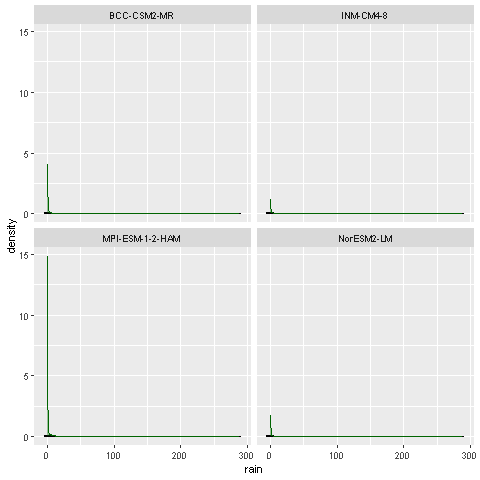

CPU times: total: 21.2 s
Wall time: 37.8 s


In [14]:
%%time
%%R

library(dplyr)
library(arrow)
library(ggplot2)

data <- open_dataset("data/combined_data.parquet") |>
    select("rain (mm/day)", "file") |>
    rename("rain" = "rain (mm/day)") |>
    collect()

# set seed and reduce dataset size for ggplot
set.seed(8675309)
data <- data |> sample_frac(0.5)

data$file <- as.factor(data$file)

# set seed and select 4 random file names for comparison
set.seed(8675309)
file_list <- sample(unique(data$file), 4)

data <- data |>
    filter(file %in% file_list)

# Histogram with kernel density
ggplot(data, aes(x = rain)) + 
   geom_histogram(aes(y = ..density..),
                  colour = 1, fill = "white") +
    geom_density(colour = 'darkgreen',
                 fill = 'darkgreen',
                 alpha = 0.4) +
    facet_wrap(~file)

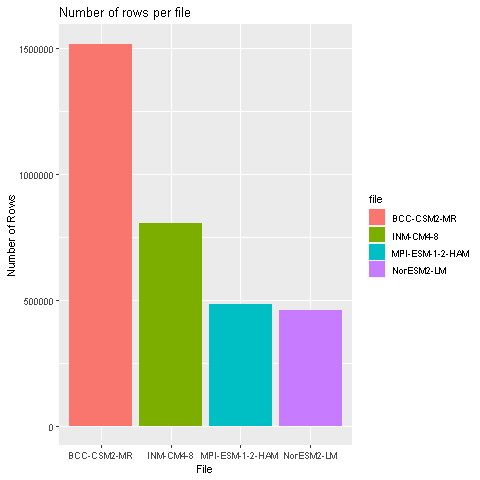

CPU times: total: 1.53 s
Wall time: 1.64 s


In [15]:
%%time 
%%R

## count of records

ggplot(data, aes(x = file, fill=file)) +
    geom_bar(stat = 'count') + 
labs(
title = 'Number of rows per file',
x = 'File',
y = 'Number of Rows')

## Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza Mirzazadeh |  |  |  |  |
| Taiwo          |  |  |  |  |  |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   |    |
| Ramiro Mejia          | Windows 10 x64   | 8     |  Intel Core i5-9300H 2.40 GHz             | No    |5s      |

## Final Discussion

- Running a with 8GB of RAM can be a computationally expensive task for the computer. File partitioning and parquet files offer a great advantage over regular methods.